# Introduction about  project


                                    What is problem statement?
Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

                                what is hypothesis in our problem?
 1.Salary: Applicants with high income should have more chances of loan approval.

 2.Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.

 3.Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval  should be high.

 4.Loan term: Loan for less time period and less amount should have higher chances of approval.

 5.EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.
 
 6.Dependents : if less dependents then chances are high of approval.
 
 7.coapplicnts income: if coapplicant income is high then chances are high of approval


# Import important libraries

In [5]:
import pandas as pd   
import numpy as np    #for mathematical calculation
import matplotlib.pyplot as plt    #for plotting graphs
%matplotlib inline
import seaborn as sns       #for data visualization
import warnings         #to ignore any warnings
warnings.filterwarnings("ignore")

# import dataset (train,test files)

In [7]:
train=pd.read_csv(r'E:\train_data loan.csv')   #in train file both depen and indep variable is present
test=pd.read_csv(r'E:\test_loan.csv')    #in test file only independent variable is present

In [9]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# understanding the data

In [13]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [17]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [19]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [21]:
train.shape

(614, 13)

In [23]:
test.shape

(367, 12)

In [25]:
train["Loan_Status"].value_counts()


Y    422
N    192
Name: Loan_Status, dtype: int64

In [27]:
train["Loan_Status"].value_counts(normalize=True)    #due to normalize we get values in proportion

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

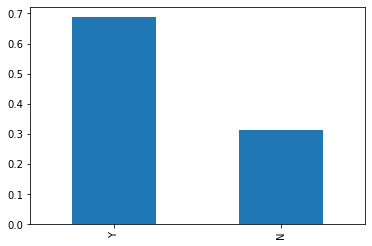

In [29]:
train["Loan_Status"].value_counts(normalize=True).plot.bar()

from this we get idea that around 68% application were approved

# univariate analysis

Fistly we will take categorial variable and do analysis of each variable

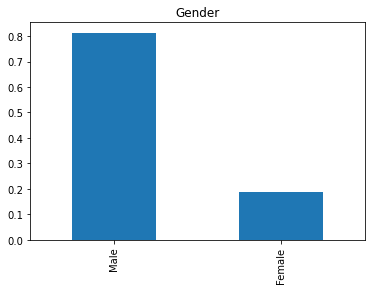

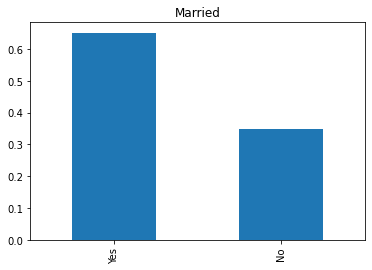

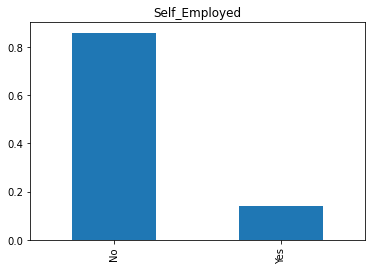

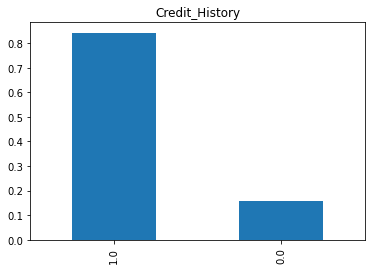

In [31]:
train["Gender"].value_counts(normalize=True).plot.bar( title="Gender")
plt.show()
train["Married"].value_counts(normalize=True).plot.bar(title="Married")
plt.show()

train["Self_Employed"].value_counts(normalize=True).plot.bar(title="Self_Employed")
plt.show()

train["Credit_History"].value_counts(normalize=True).plot.bar(title="Credit_History")
plt.show()



what we see from above plots?
* in our dataset there are nearly 80% male.
* 65% applicant are married
* around 17% applicant is self employed
* Around 85% of applicants have repaid their doubts.


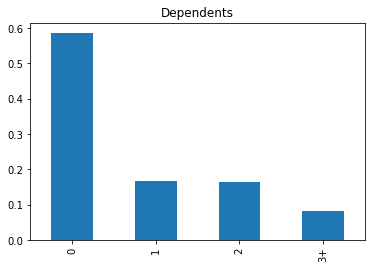

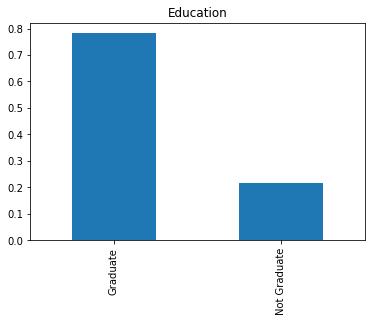

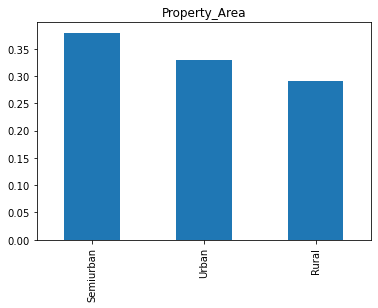

In [33]:
train["Dependents"].value_counts(normalize=True).plot.bar( title="Dependents")
plt.show()
train["Education"].value_counts(normalize=True).plot.bar(title="Education")
plt.show()
train["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area")
plt.show()

Inference from above plots 
* around 37% applicants are from semiurban area
* around 78% applicants are graduates
* around 56% applicants have no independents and around 9% have 3+ independents

<AxesSubplot:>

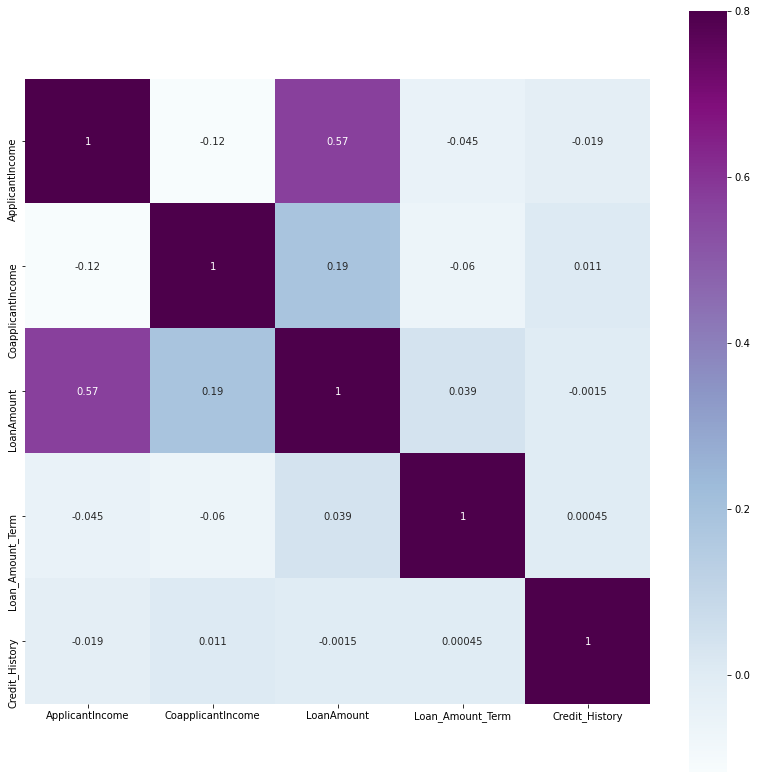

In [35]:
matrix=train.corr()
f, ax = plt.subplots(figsize=(14,14))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu', annot = True)

# 

Inference?
here we see that correlation between applicant income and loan amount is 0.57 

# Missing value imputation

In [37]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

here we see that there is missing values in variable where sum in no zero. i.e variable with gender,married,dependents,self employed,loan amount,loan amount term ,credit history

Now we will fill this missing values 

In [ ]:
train["Gender"].fillna(train["Gender"].mode()[0], inplace=True)
train["Married"].fillna(train["Married"].mode()[0], inplace=True)
train["Dependents"].fillna(train["Dependents"].mode()[0], inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0], inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0], inplace=True)


In [ ]:
train["Loan_Amount_Term"].value_counts()

In [ ]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0], inplace=True)

In [ ]:
train[‘LoanAmount’].fillna(train[‘LoanAmount’].median(), inplace=True)

In [ ]:
train.isnull().sum()

# importing imp library

In [ ]:
import pandas as pd                 
import numpy as np  #for mathematical calculation
import seaborn as sns   #for data visualization
import matplotlib.pyplot as plt # for plotting graphs
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy import stats
from statsmodels.stats import weightstats as stests
import warnings
warnings.filterwarnings("ignore")

# Model building

Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.

*Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1/O. Yes/No, True / False) given a set of independent variables.

*Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.

*This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function

In [39]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [44]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

KeyError: "['Loan_ID'] not found in axis"